In [1]:
 # کتابخانه های مورد نیاز را وارد می کنیم

import pandas as pd  # DataFrame برای کار با داده‌ها با استفاده از
import numpy as np  # برای کار با محاسبات عددی
import matplotlib.pyplot as plt  # برای رسم نمودارها و تصاویر
import seaborn as sns  # برای رسم نمودارهای آماری و اطلاعاتی
from sklearn.model_selection import train_test_split  # برای تقسیم داده به داده‌های آموزش و تست
from sklearn.metrics import confusion_matrix, classification_report, auc  # برای ارزیابی مدل
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score  # برای ارزیابی مدل
from sklearn.neighbors import KNeighborsClassifier #برای knn
from sklearn.model_selection import cross_val_score# ولیدیشن
from sklearn.tree import DecisionTreeClassifier#درخت تصمیم
from sklearn.preprocessing import LabelEncoder, StandardScaler# استاندارد و تبدیل ویژگی غیر عددی به عددی
from sklearn.svm import SVC #svm
from imblearn.over_sampling import SMOTE# جلوگیری از بایاس،اضافه کردن نمونه مصنوعی
from sklearn.decomposition import PCA#کاهش بعد

In [2]:
# آدرس محل ذخیره فایل داده
file_path = '/content/Dataset.csv'

#CSV خواندن فایل داده بافرمت
data = pd.read_csv(file_path)

In [3]:
# چاپ نام فایل داده
print("File Name:", file_path)

# چاپ سه خط اول فایل
print('the first 3 lines:')
data.head(3)

File Name: /content/Dataset.csv
the first 3 lines:


,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,0,12/1/2008,Station 2,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,1,12/2/2008,Station 2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2,12/3/2008,Station 2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [4]:
# چاپ سه خط تصادفی از داده
print('3 random lines:')

# تعداد ردیف‌ها برای انتخاب تصادفی
num_rows_to_select = 3

# ایجاد شاخص‌ ها برای ردیف‌ها
random_row_indices = np.random.choice(data.shape[0], size=num_rows_to_select, replace=False)

# انتخاب و چاپ ردیف‌های تصادفی انتخاب شده
random_rows = data.iloc[random_row_indices]
random_rows

3 random lines:


,Unnamed: 0,Date,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
130122,130122,4/11/2009,Station 15,10.5,20.4,1.2,2.6,6.9,NNW,28.0,...,82.0,60.0,1025.7,1021.5,7.0,2.0,12.3,18.3,Yes,No
63319,63319,2/5/2015,Station 35,12.2,23.4,0.0,NaN,NaN,ESE,43.0,...,65.0,53.0,1025.2,1024.7,NaN,NaN,18.6,22.4,No,No
12502,12502,3/12/2010,Station 21,14.8,30.8,0.0,10.0,11.3,ESE,41.0,...,50.0,26.0,1028.5,1025.5,1.0,3.0,21.2,30.1,No,No


In [5]:
# اطلاعات کلی از داده‌ها
print("اطلاعات کلی از داده‌ها:\n")
data.info()

اطلاعات کلی از داده‌ها:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    145460 non-null  int64  
 1   Date                          145460 non-null  object 
 2   Weather Station               145460 non-null  object 
 3   Minimum Temperature           143975 non-null  float64
 4   Maximum Temperature           144199 non-null  float64
 5   Rainfall                      142199 non-null  float64
 6   Evaporation                   82670 non-null   float64
 7   Sunshine                      75625 non-null   float64
 8   Gust Trajectory               135134 non-null  object 
 9   Air Velocity                  135197 non-null  float64
 10  Gust Trajectory at  9 AM      134894 non-null  object 
 11  Gust Trajectory at  3 PM      141232 non-null  object 
 12  Air Velocity at  9 

In [6]:
# گزارش آماری اولیه
print("\nآمارهای اولیه:")
print(data.describe().round(2))

data['Rain the day after'].value_counts()



آمارهای اولیه:
       Unnamed: 0  Minimum Temperature  Maximum Temperature   Rainfall  \
count   145460.00            143975.00            144199.00  142199.00   
mean     72729.50                12.19                23.22       2.36   
std      41990.83                 6.40                 7.12       8.48   
min          0.00                -8.50                -4.80       0.00   
25%      36364.75                 7.60                17.90       0.00   
50%      72729.50                12.00                22.60       0.00   
75%     109094.25                16.90                28.20       0.80   
max     145459.00                33.90                48.10     371.00   

       Evaporation  Sunshine  Air Velocity  Air Velocity at  9 AM  \
count     82670.00  75625.00     135197.00              143693.00   
mean          5.47      7.61         40.04                  14.04   
std           4.19      3.79         13.61                   8.92   
min           0.00      0.00          6.0

Rain the day after
No     110316
Yes     31877
Name: count, dtype: int64

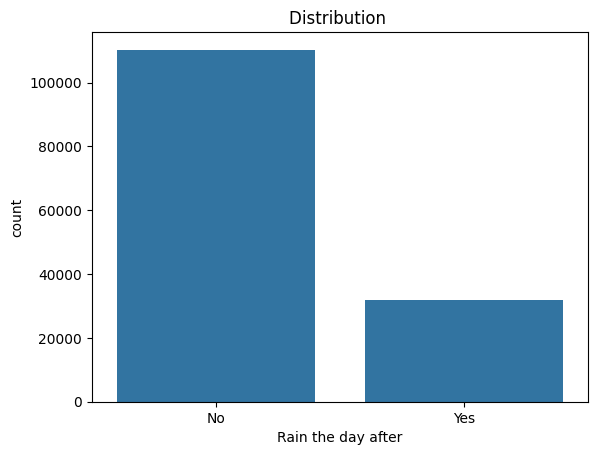

In [7]:
# توزیع
sns.countplot(x='Rain the day after', data=data)
plt.title('Distribution ')
plt.show()

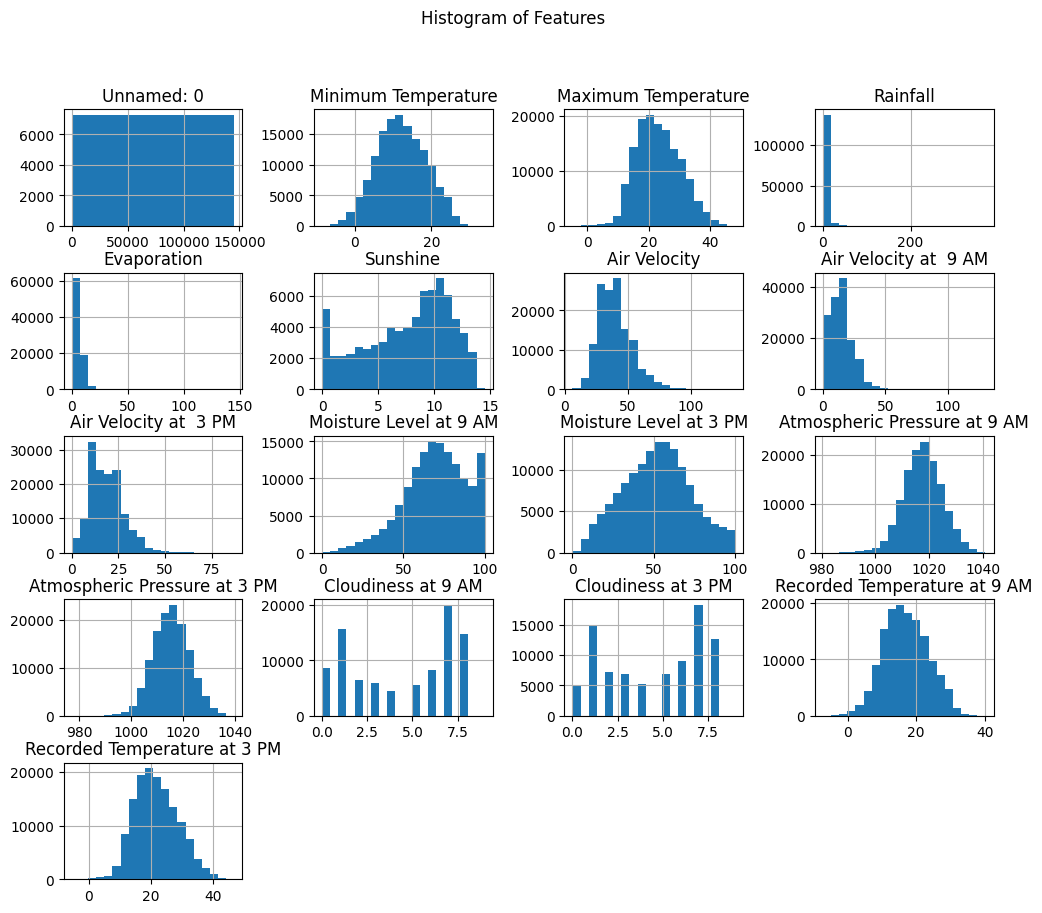

In [8]:
#رسم هیستوگرام ویژگی‌ها

data.drop([], axis=1).hist(bins=20, figsize=(12, 10)) #  مشخص کردن ویژگی های هیستوگرام
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle('Histogram of Features')
plt.show()

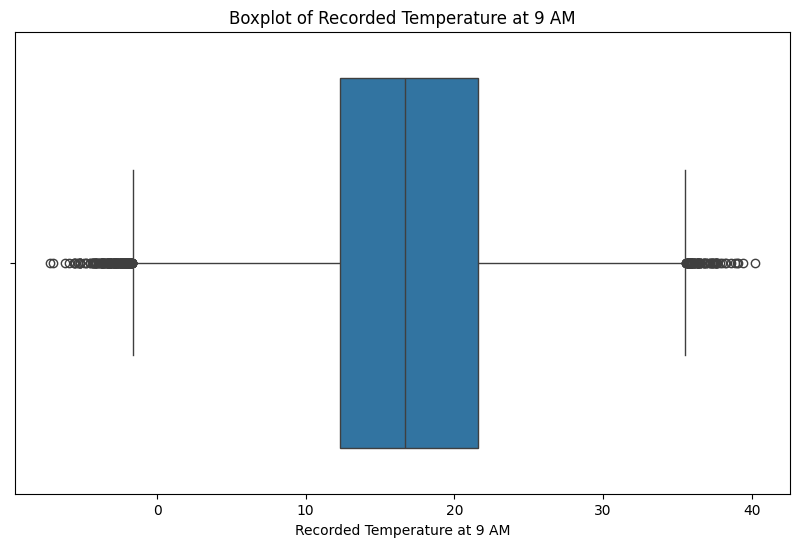

In [9]:
# رسم نمودار جعبه‌ای برای مقایسه دما در زمان‌های مختلف
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recorded Temperature at 9 AM', data=data)
plt.title('Boxplot of Recorded Temperature at 9 AM')
plt.show()

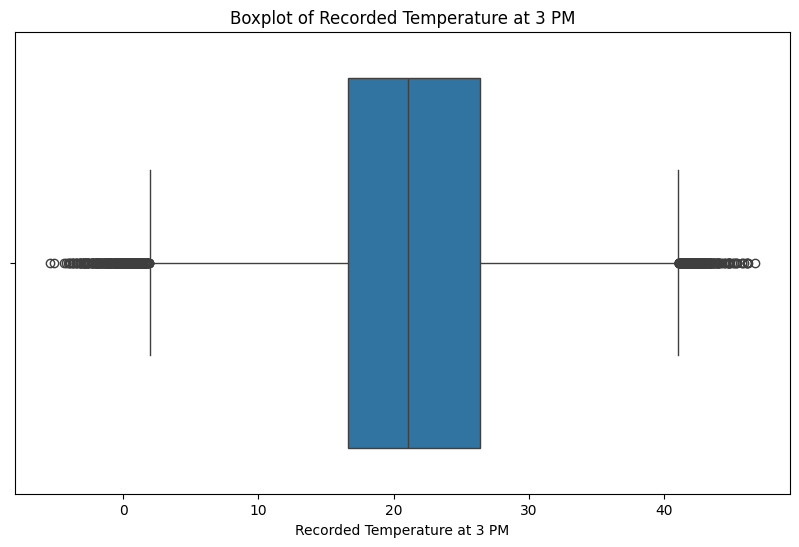

In [10]:
# رسم نمودار جعبه‌ای برای مقایسه دما در زمان‌های مختلف
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recorded Temperature at 3 PM', data=data)
plt.title('Boxplot of Recorded Temperature at 3 PM')
plt.show()

<ipython-input-11-2cf832556990>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weather Station', y='Maximum Temperature', data=data, estimator=np.mean, ci=None)


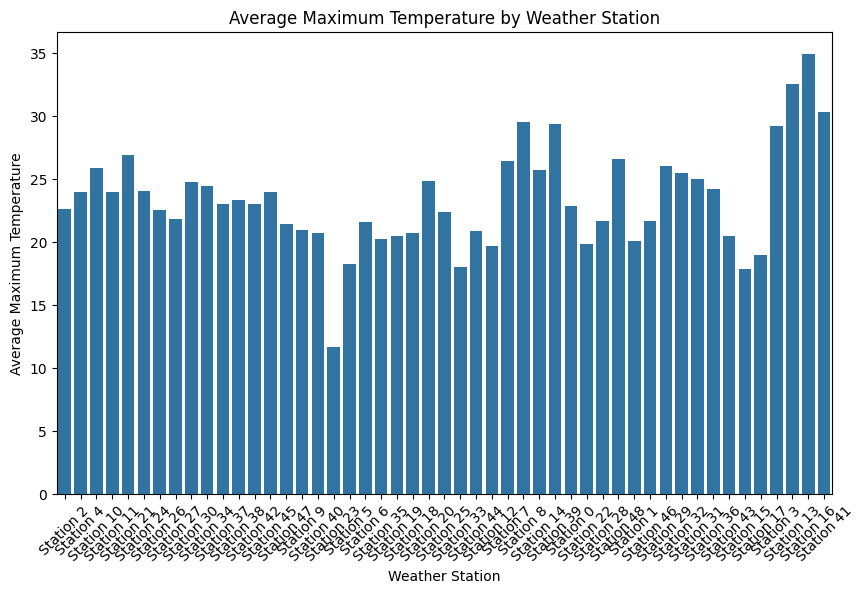

In [11]:
# رسم نمودار میله‌ای برای میانگین دما در ایستگاه‌های مختلف
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather Station', y='Maximum Temperature', data=data, estimator=np.mean, ci=None)
plt.title('Average Maximum Temperature by Weather Station')
plt.xlabel('Weather Station')
plt.ylabel('Average Maximum Temperature')
plt.xticks(rotation=45)
plt.show()

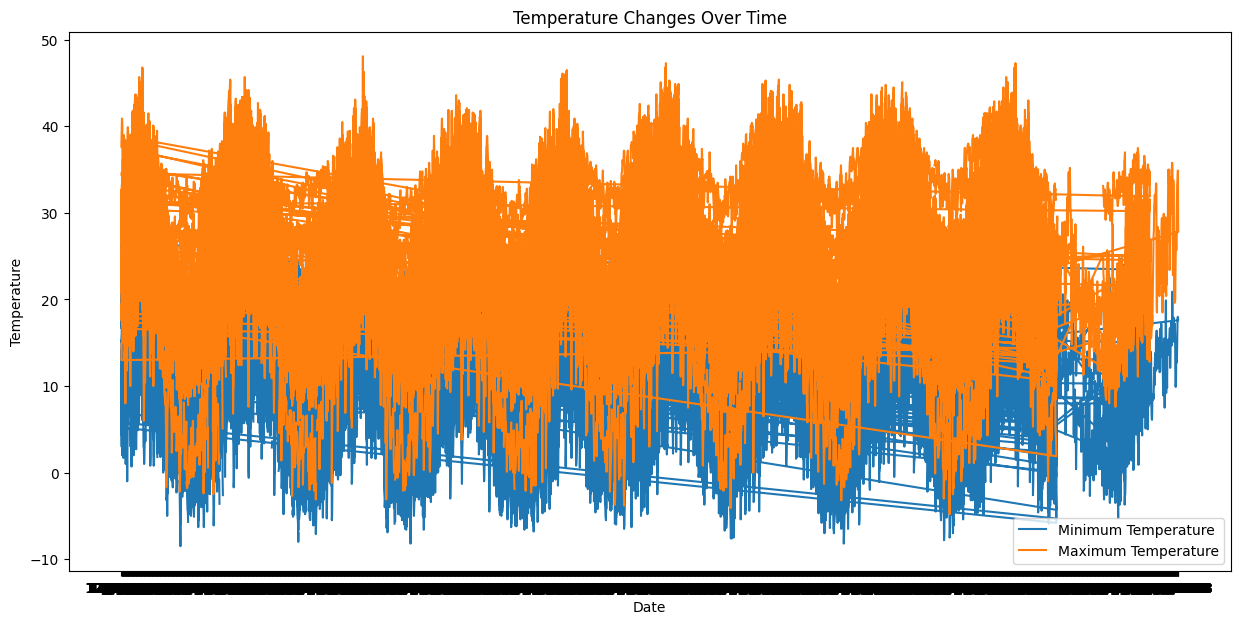

In [12]:
# رسم نمودار خطی برای تغییرات دما در طول زمان
plt.figure(figsize=(15, 7))
plt.plot(data['Date'], data['Minimum Temperature'], label='Minimum Temperature')
plt.plot(data['Date'], data['Maximum Temperature'], label='Maximum Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Changes Over Time')
plt.legend()
plt.show()

In [13]:
# نمایش تعداد داده‌های ناقص در هر ستون
print(data.isnull().sum())


Unnamed: 0                          0
Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64


In [14]:
# شناسایی ستون‌های بدون عنوان
unnamed_cols = [col for col in data.columns if 'Unnamed' in col]
columns_to_drop = unnamed_cols + ['Date']

# حذف ستون‌های دلخواه
data = data.drop(columns=columns_to_drop)


In [15]:
# تکمیل داده‌های عددی ناقص با میانگین
numeric_features = data.select_dtypes(include=[np.number]).columns
data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

# تکمیل داده‌های دسته‌ای ناقص با بیشترین مقدار
categorical_features = data.select_dtypes(include=[object]).columns
data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

print(data.isnull().sum())  # بررسی مجدد داده‌های ناقص

Weather Station                 0
Minimum Temperature             0
Maximum Temperature             0
Rainfall                        0
Evaporation                     0
Sunshine                        0
Gust Trajectory                 0
Air Velocity                    0
Gust Trajectory at  9 AM        0
Gust Trajectory at  3 PM        0
Air Velocity at  9 AM           0
Air Velocity at  3 PM           0
Moisture Level at 9 AM          0
Moisture Level at 3 PM          0
Atmospheric Pressure at 9 AM    0
Atmospheric Pressure at 3 PM    0
Cloudiness at 9 AM              0
Cloudiness at 3 PM              0
Recorded Temperature at 9 AM    0
Recorded Temperature at 3 PM    0
Rain that day                   0
Rain the day after              0
dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

# ساخت یک LabelEncoder برای تبدیل مقادیر غیر عددی به اعداد
label_encoder = LabelEncoder()

# یافتن ستون‌های غیر عددی
non_numeric_columns = data.select_dtypes(include=['object']).columns

# تبدیل مقادیر غیر عددی به اعداد با استفاده از LabelEncoder
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))

# نمایش اولین چند سطر از داده‌ها برای بررسی
data.head(10)

,Weather Station,Minimum Temperature,Maximum Temperature,Rainfall,Evaporation,Sunshine,Gust Trajectory,Air Velocity,Gust Trajectory at 9 AM,Gust Trajectory at 3 PM,...,Moisture Level at 9 AM,Moisture Level at 3 PM,Atmospheric Pressure at 9 AM,Atmospheric Pressure at 3 PM,Cloudiness at 9 AM,Cloudiness at 3 PM,Recorded Temperature at 9 AM,Recorded Temperature at 3 PM,Rain that day,Rain the day after
0,12,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,12,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,12,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,12,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,12,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0
5,12,14.6,29.7,0.2,5.468232,7.611178,14,56.0,13,13,...,55.0,23.0,1009.2,1005.4,4.447461,4.50993,20.6,28.9,0,0
6,12,14.3,25.0,0.0,5.468232,7.611178,13,50.0,12,13,...,49.0,19.0,1009.6,1008.2,1.000000,4.50993,18.1,24.6,0,0
7,12,7.7,26.7,0.0,5.468232,7.611178,13,35.0,10,13,...,48.0,19.0,1013.4,1010.1,4.447461,4.50993,16.3,25.5,0,0
8,12,9.7,31.9,0.0,5.468232,7.611178,6,80.0,9,7,...,42.0,9.0,1008.9,1003.6,4.447461,4.50993,18.3,30.2,0,1
9,12,13.1,30.1,1.4,5.468232,7.611178,13,28.0,8,10,...,58.0,27.0,1007.0,1005.7,4.447461,4.50993,20.1,28.2,1,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Weather Station               145460 non-null  int64  
 1   Minimum Temperature           145460 non-null  float64
 2   Maximum Temperature           145460 non-null  float64
 3   Rainfall                      145460 non-null  float64
 4   Evaporation                   145460 non-null  float64
 5   Sunshine                      145460 non-null  float64
 6   Gust Trajectory               145460 non-null  int64  
 7   Air Velocity                  145460 non-null  float64
 8   Gust Trajectory at  9 AM      145460 non-null  int64  
 9   Gust Trajectory at  3 PM      145460 non-null  int64  
 10  Air Velocity at  9 AM         145460 non-null  float64
 11  Air Velocity at  3 PM         145460 non-null  float64
 12  Moisture Level at 9 AM        145460 non-nul

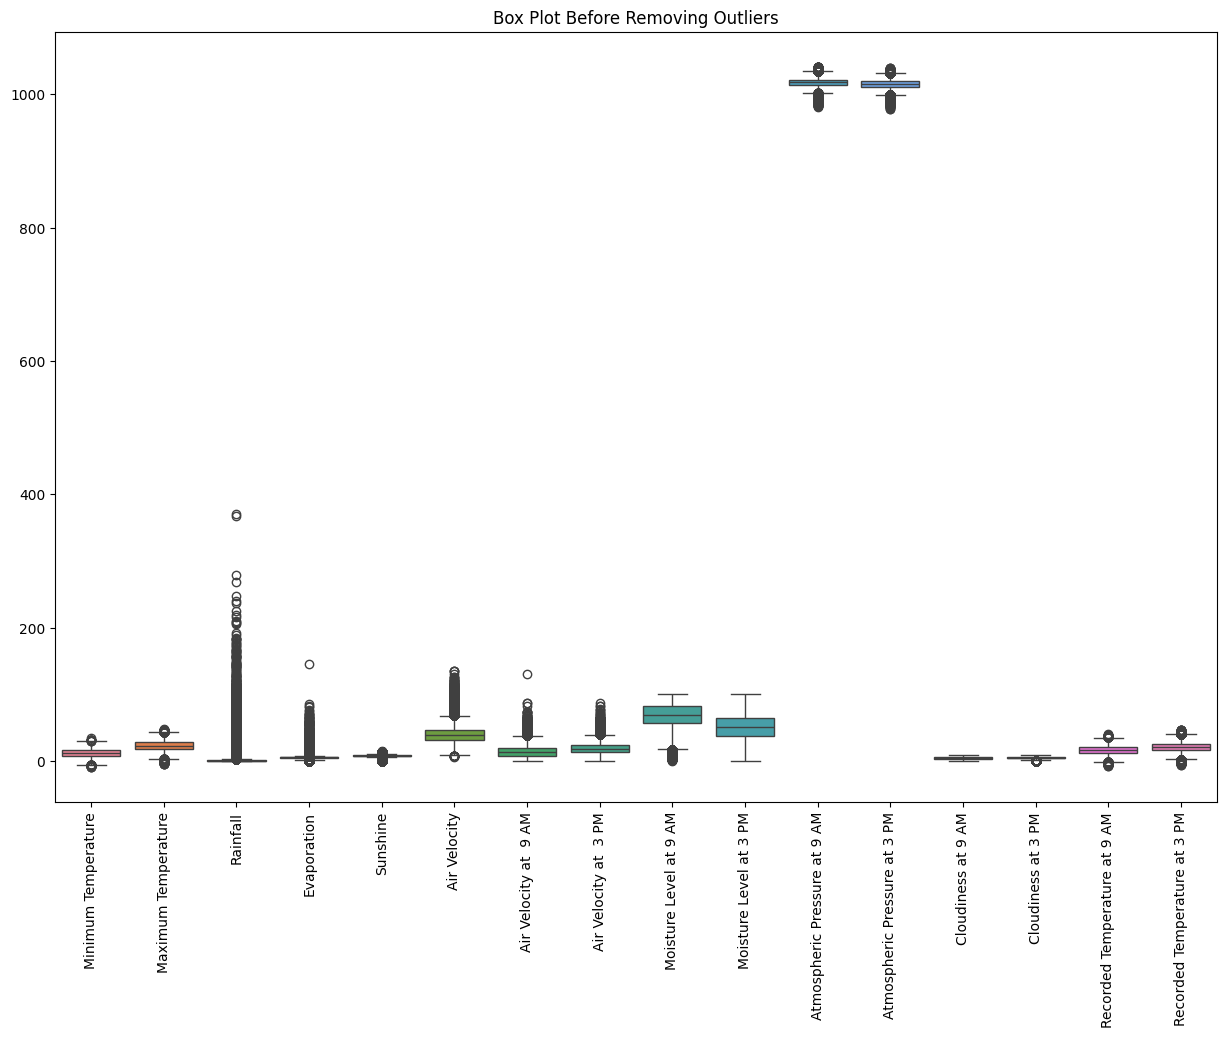

In [18]:
# رسم نمودار جعبه‌ای قبل از حذف داده‌های پرت
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_features])
plt.title('Box Plot Before Removing Outliers')
plt.xticks(rotation=90)
plt.show()



In [19]:
# شناسایی و حذف داده‌های پرت با استفاده از IQR
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for column in numeric_features:
    data = remove_outliers(data, column)

print(data.shape)  # نمایش شکل دیتاست پس از حذف داده‌های پرت


(30313, 22)


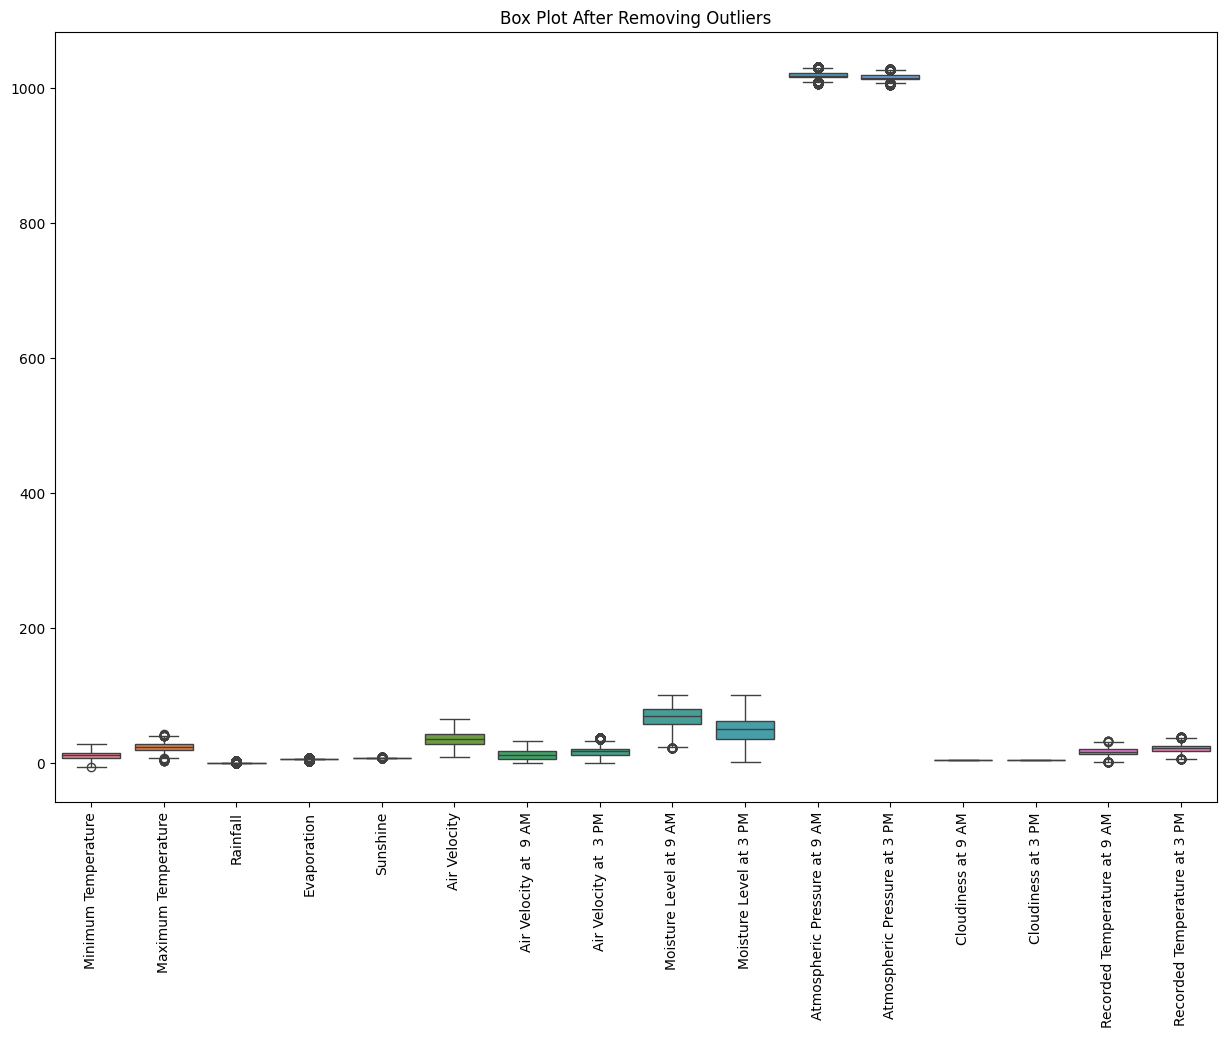

In [20]:
# رسم نمودار جعبه‌ای بعد از حذف داده‌های پرت
plt.figure(figsize=(15, 10))
sns.boxplot(data=data[numeric_features])
plt.title('Box Plot After Removing Outliers')
plt.xticks(rotation=90)
plt.show()

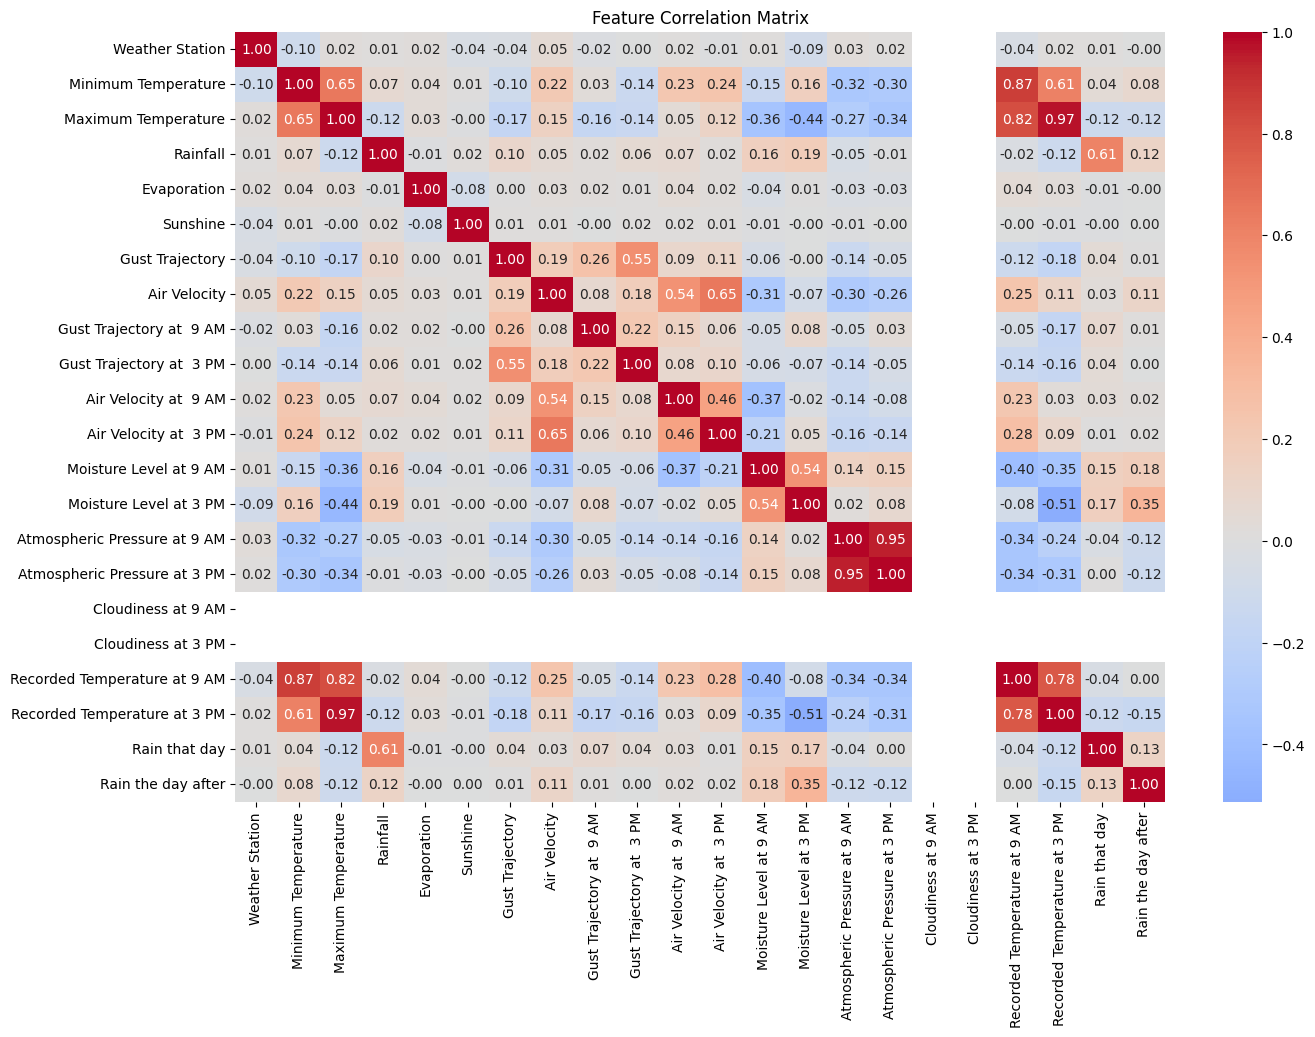

In [21]:
# محاسبه ماتریس همبستگی
corr = data.corr()

# رسم ماتریس همبستگی
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

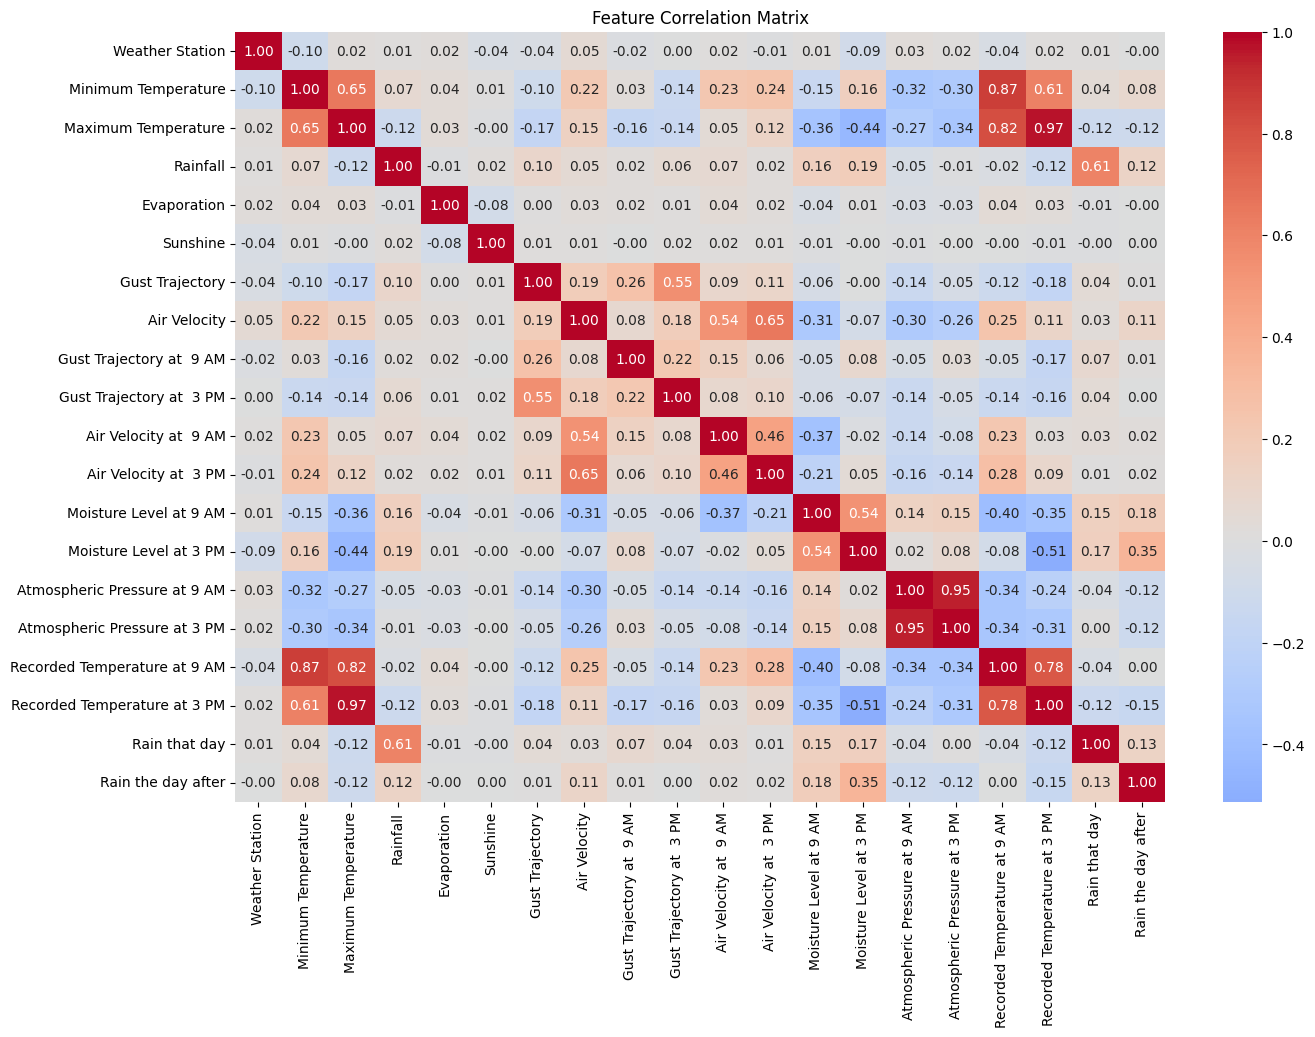

In [22]:
from sklearn.feature_selection import VarianceThreshold

# حذف ویژگی‌هایی که واریانس صفر دارند
selector = VarianceThreshold(threshold=0.0)
data_reduced = selector.fit_transform(data)

# ایجاد DataFrame جدید با ویژگی‌های منتخب
data_reduced = pd.DataFrame(data_reduced, columns=data.columns[selector.get_support(indices=True)])

# محاسبه ماتریس همبستگی
corr = data_reduced.corr()

# رسم ماتریس همبستگی
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [23]:
# یافتن و چاپ ستون‌هایی که همبستگی بالایی دارند
threshold = 0.9
correlation_matrix = data.corr()
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr = corr_pairs[(corr_pairs['Correlation'] > threshold) & (corr_pairs['Feature1'] != corr_pairs['Feature2'])]

print("Features with high correlation:")
print(high_corr)

# حذف ویژگی‌های با همبستگی بالا
features_to_drop = set()
for feature1, feature2 in high_corr[['Feature1', 'Feature2']].values:
    features_to_drop.add(feature1)

data.drop(columns=list(features_to_drop), inplace=True)
print("Features dropped due to high correlation:", features_to_drop)


Features with high correlation:
                         Feature1                      Feature2  Correlation
63            Maximum Temperature  Recorded Temperature at 3 PM     0.968606
323  Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM     0.945585
344  Atmospheric Pressure at 3 PM  Atmospheric Pressure at 9 AM     0.945585
420  Recorded Temperature at 3 PM           Maximum Temperature     0.968606
Features dropped due to high correlation: {'Maximum Temperature', 'Recorded Temperature at 3 PM', 'Atmospheric Pressure at 9 AM', 'Atmospheric Pressure at 3 PM'}


In [24]:
# تقسیم ویژگی‌ها و برچسب‌ها
X = data.drop('Rain the day after', axis=1)
y = data['Rain the day after']


In [25]:
data.shape

(30313, 18)

In [26]:
# اعمال SMOTE برای توازن داده‌ها
smote = SMOTE(sampling_strategy='auto')
X_res, y_res = smote.fit_resample(X, y)

# نمایش تعداد نمونه‌ها پس از SMOTE
print(y_res.value_counts())

Rain the day after
0    26122
1    26122
Name: count, dtype: int64


In [27]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [38]:
# کاهش بعد با استفاده از PCA
PCA(n_components=0.95)
X_res_pca = pca.fit_transform(X_res_scaled)

In [29]:
# تقسیم داده‌ها به مجموعه‌های آموزشی، اعتبارسنجی و تست
X_train, X_temp, y_train, y_temp = train_test_split(X_res_scaled, y_res, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_valid.shape, X_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

# پیاده‌سازی مدل SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


(36570, 17) (7837, 17) (7837, 17)
(36570,) (7837,) (7837,)


SVC(kernel='linear')

In [30]:
# ارزیابی مدل
y_pred_train = svm_model.predict(X_train)
y_pred_valid = svm_model.predict(X_valid)
y_pred_test = svm_model.predict(X_test)

In [31]:
print("Train Classification Report:")
print(classification_report(y_train, y_pred_train))

print("Validation Classification Report:")
print(classification_report(y_valid, y_pred_valid))

print("Test Classification Report:")
print(classification_report(y_test, y_pred_test))


Train Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74     18236
           1       0.75      0.71      0.73     18334

    accuracy                           0.74     36570
   macro avg       0.74      0.74      0.74     36570
weighted avg       0.74      0.74      0.74     36570

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      3970
           1       0.74      0.71      0.72      3867

    accuracy                           0.73      7837
   macro avg       0.73      0.73      0.73      7837
weighted avg       0.73      0.73      0.73      7837

Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      3916
           1       0.74      0.70      0.72      3921

    accuracy                           0.73      7837
   macro avg       0.73      0.73    

In [32]:
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Train Precision:", precision_score(y_train, y_pred_train))
print("Train Recall:", recall_score(y_train, y_pred_train))
print("Train F1 Score:", f1_score(y_train, y_pred_train))

print("Validation Accuracy:", accuracy_score(y_valid, y_pred_valid))
print("Validation Precision:", precision_score(y_valid, y_pred_valid))
print("Validation Recall:", recall_score(y_valid, y_pred_valid))
print("Validation F1 Score:", f1_score(y_valid, y_pred_valid))

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Precision:", precision_score(y_test, y_pred_test))
print("Test Recall:", recall_score(y_test, y_pred_test))
print("Test F1 Score:", f1_score(y_test, y_pred_test))

Train Accuracy: 0.736231884057971
Train Precision: 0.7492540739040624
Train Recall: 0.7122286462310461
Train F1 Score: 0.7302723561322073
Validation Accuracy: 0.7336991195610565
Validation Precision: 0.7397629310344828
Validation Recall: 0.7101111973105767
Validation F1 Score: 0.7246338567093286
Test Accuracy: 0.7279571264514483
Test Precision: 0.7403923676431067
Test Recall: 0.7026268808977302
Test F1 Score: 0.7210154409840355


In [33]:
# محاسبه و چاپ ماتریس درهم‌ریختگی
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_valid = confusion_matrix(y_valid, y_pred_valid)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Train Confusion Matrix:")
print(conf_matrix_train)

print("Validation Confusion Matrix:")
print(conf_matrix_valid)

print("Test Confusion Matrix:")
print(conf_matrix_test)

Train Confusion Matrix:
[[13866  4370]
 [ 5276 13058]]
Validation Confusion Matrix:
[[3004  966]
 [1121 2746]]
Test Confusion Matrix:
[[2950  966]
 [1166 2755]]


In [34]:

k_folds = 5

# لیستی از مقادیر برای پارامتر K که می‌خواهیم امتحان کنیم
k_values = list(range(1, 10))

# لیستی برای نگه‌داری دقت‌های هر مقدار K
accuracies = []

# انجام اعتبارسنجی متقاطع برای هر مقدار K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_res_scaled, y_res, cv=k_folds, scoring='accuracy')
    accuracies.append(scores.mean())

# یافتن بهترین مقدار K بر اساس دقت میانگین
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print('بهترین مقدار K: ', best_k)
print('دقت متناظر: {:.2f}%'.format(best_accuracy * 100))

بهترین مقدار K:  2
دقت متناظر: 83.07%


دقت مدل: 84.89%
Train Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5191
           1       0.80      0.94      0.86      5258

    accuracy                           0.85     10449
   macro avg       0.86      0.85      0.85     10449
weighted avg       0.86      0.85      0.85     10449



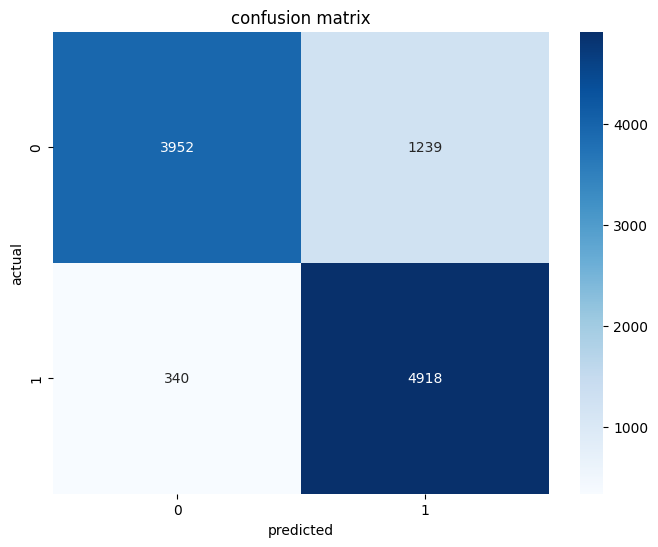

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.2, random_state=42)
KNn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# پیش‌بینی بر اساس داده‌های آزمون
y_pred = knn.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print('دقت مدل: {:.2f}%'.format(accuracy * 100))

print("Train Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()

In [36]:
dt = DecisionTreeClassifier()

# آموزش مدل بر روی داده‌های آموزشی
dt.fit(X_train, y_train)

# پیش‌بینی بر روی داده‌های آزمون
y_pred = dt.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print('دقت مدل درخت تصمیم: {:.2f}%'.format(accuracy * 100))

دقت مدل درخت تصمیم: 87.46%


Train Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5191
           1       0.87      0.88      0.88      5258

    accuracy                           0.87     10449
   macro avg       0.87      0.87      0.87     10449
weighted avg       0.87      0.87      0.87     10449



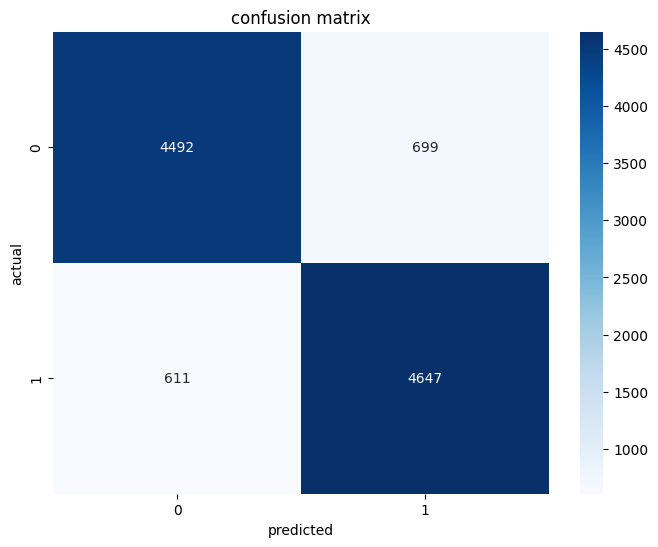

In [37]:
print("Train Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
plt.show()